## Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


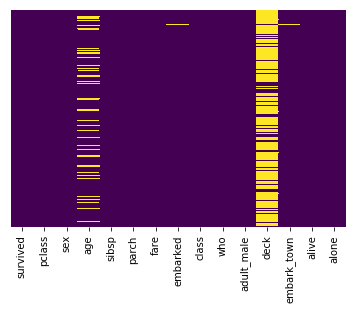

In [6]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

In [9]:
titanic.groupby('embarked')['embarked'].count()

embarked
C    168
Q     77
S    644
Name: embarked, dtype: int64

In [10]:
titanic.groupby('class')['class'].count()

class
First     216
Second    184
Third     491
Name: class, dtype: int64

In [11]:
titanic.groupby('who')['who'].count()

who
child     83
man      537
woman    271
Name: who, dtype: int64

In [12]:
titanic.groupby('embark_town')['embark_town'].count()

embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: embark_town, dtype: int64

In [13]:
titanic.groupby('alive')['alive'].count()

alive
no     549
yes    342
Name: alive, dtype: int64

In [14]:
titanic.groupby('alone')['alone'].count()

alone
False    354
True     537
Name: alone, dtype: int64

In [15]:
df_sex = pd.get_dummies(titanic['sex'],drop_first=True)
df_embarked = pd.get_dummies(titanic['embarked'],drop_first=True)
df_class = pd.get_dummies(titanic['class'],drop_first=True)
df_who = pd.get_dummies(titanic['who'],drop_first=True)
df_embark_town = pd.get_dummies(titanic['embark_town'],drop_first=True)
df_alone = pd.get_dummies(titanic['alone'],drop_first=True)

In [20]:
titanic = pd.concat([titanic,df_sex,df_embarked,df_class,df_who,df_embark_town,df_alone],axis = 1)

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,male,Q,S,Second,Third,man,woman,Queenstown,Southampton,True
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,1,0,1,0,1,1,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,0,0,0,0,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,0,0,1,0,1,0,1,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,1,0,0,0,1,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,1,0,1,0,1,1,0,0,1,1


In [22]:
titanic.drop(['sex','embarked','class','who','embark_town','alone'],axis=1,inplace=True)

In [23]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,deck,alive,male,Q,S,Second,Third,man,woman,Queenstown,Southampton,True
0,0,3,22.0,1,0,7.2500,True,NaN,no,1,0,1,0,1,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,False,C,yes,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,False,NaN,yes,0,0,1,0,1,0,1,0,1,1
3,1,1,35.0,1,0,53.1000,False,C,yes,0,0,1,0,0,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,True,NaN,no,1,0,1,0,1,1,0,0,1,1


In [24]:
df_alive = pd.get_dummies(titanic['alive'],drop_first=True)
df_adult_male = pd.get_dummies(titanic['adult_male'],drop_first=True)

In [25]:
titanic = pd.concat([titanic,df_alive,df_adult_male],axis = 1)

In [26]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,deck,alive,male,...,S,Second,Third,man,woman,Queenstown,Southampton,True,yes,True
0,0,3,22.0,1,0,7.2500,True,NaN,no,1,...,1,0,1,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,False,C,yes,0,...,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,False,NaN,yes,0,...,1,0,1,0,1,0,1,1,1,0
3,1,1,35.0,1,0,53.1000,False,C,yes,0,...,1,0,0,0,1,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,True,NaN,no,1,...,1,0,1,1,0,0,1,1,0,1


In [27]:
titanic.drop(['alive','adult_male'],axis=1,inplace=True)

In [28]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,deck,male,Q,S,Second,Third,man,woman,Queenstown,Southampton,True,yes,True
0,0,3,22.0,1,0,7.2500,NaN,1,0,1,0,1,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,NaN,0,0,1,0,1,0,1,0,1,1,1,0
3,1,1,35.0,1,0,53.1000,C,0,0,1,0,0,0,1,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,NaN,1,0,1,0,1,1,0,0,1,1,0,1


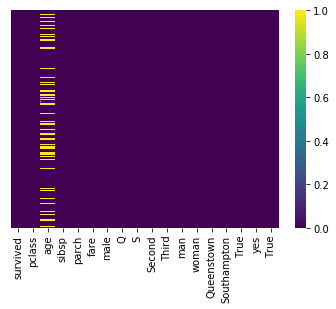

In [32]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis')

In [30]:
titanic.drop('deck',axis = 1,inplace=True)

In [31]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S,Second,Third,man,woman,Queenstown,Southampton,True,yes,True
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,1,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,0,1,1,0,1


In [40]:
titanic.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [41]:
def funct_age(cols):
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    
    else:
        return age

In [47]:
titanic['age'] = titanic[['pclass','age']].apply(funct_age,axis = 1)

In [48]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S,Second,Third,man,woman,Queenstown,Southampton,True,yes,True
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,1,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,0,1,1,0,1


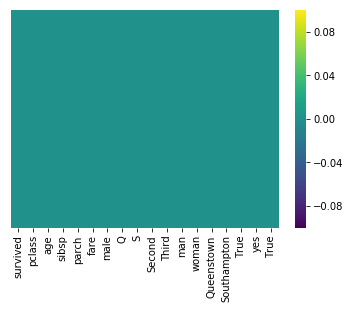

In [49]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis',cbar='False')

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.cross_validation import train_test_split

In [52]:
X = titanic.drop('survived',axis = 1)
y = titanic['survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       179



In [59]:
print(confusion_matrix(y_test,y_pred))

[[99  0]
 [ 0 80]]
